In [8]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import sklearn.metrics 
from sklearn.metrics import accuracy_score


In [17]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:
data.shape

(299, 13)

In [20]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [21]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [22]:
categorial_variables=data[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
continuous_variables=data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', ]]


In [23]:
type(categorial_variables)

pandas.core.frame.DataFrame

In [24]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [25]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [26]:
pd.set_option('display.max_rows',200)
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [27]:
continuous_variables.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [28]:
data.groupby("DEATH_EVENT").count()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,203,203,203,203,203,203,203,203,203,203,203,203
1,96,96,96,96,96,96,96,96,96,96,96,96


In [29]:
age=data[['age']]
platelets=data[['platelets']]


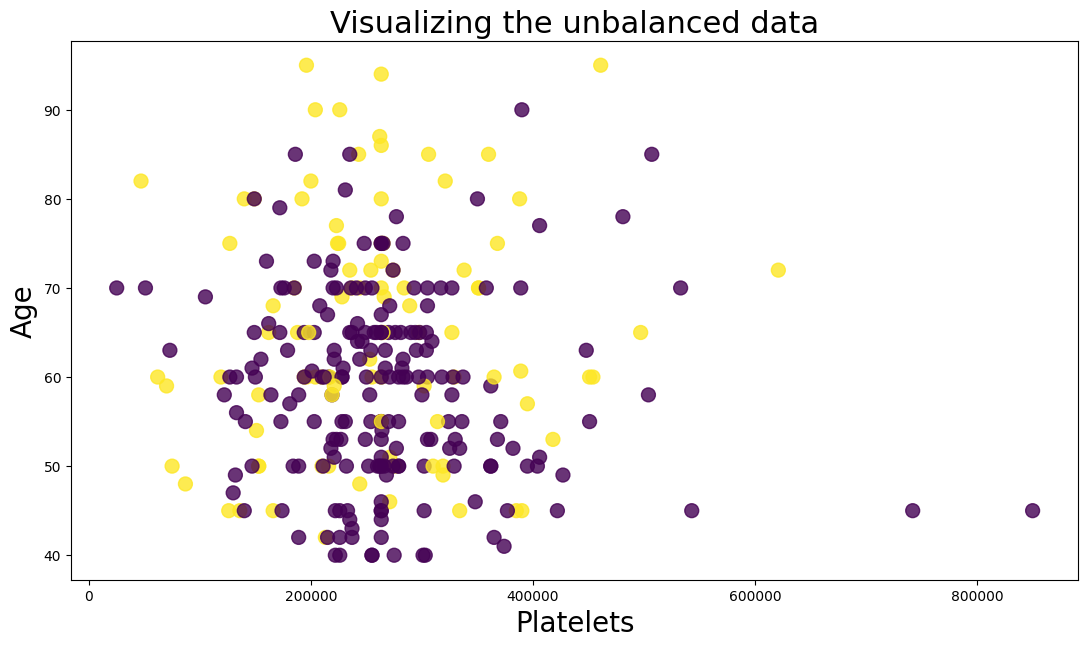

In [30]:
plt.figure(figsize=(13,7))
plt.scatter(platelets,age,c=data["DEATH_EVENT"],s=100,alpha=0.8)
plt.xlabel('Platelets',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.title('Visualizing the unbalanced data',fontsize=22)
plt.show()

In [31]:
categorial_data=['anaemia','diabetes','high_blood_pressure','sex','smoking']
continuous_data=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time', ]


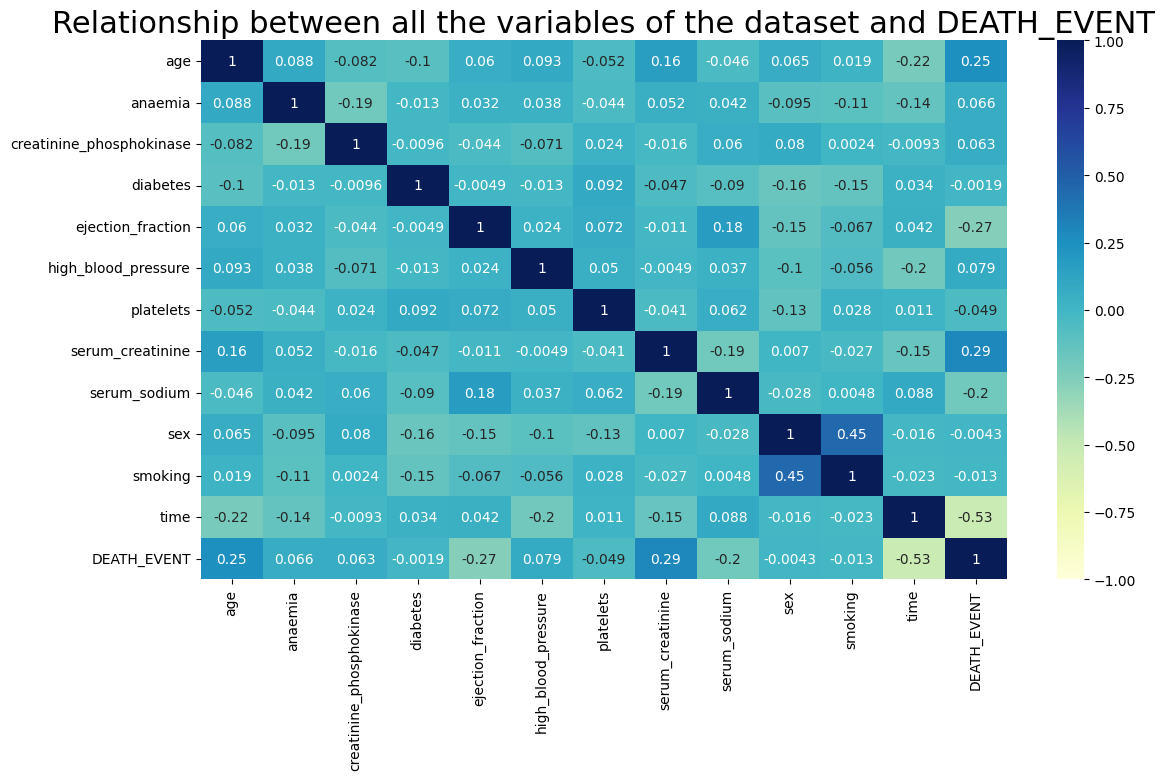

In [32]:
plt.figure(figsize=(13,7))
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='YlGnBu',annot=True)
plt.title('Relationship between all the variables of the dataset and DEATH_EVENT',fontsize=22)
plt.show()

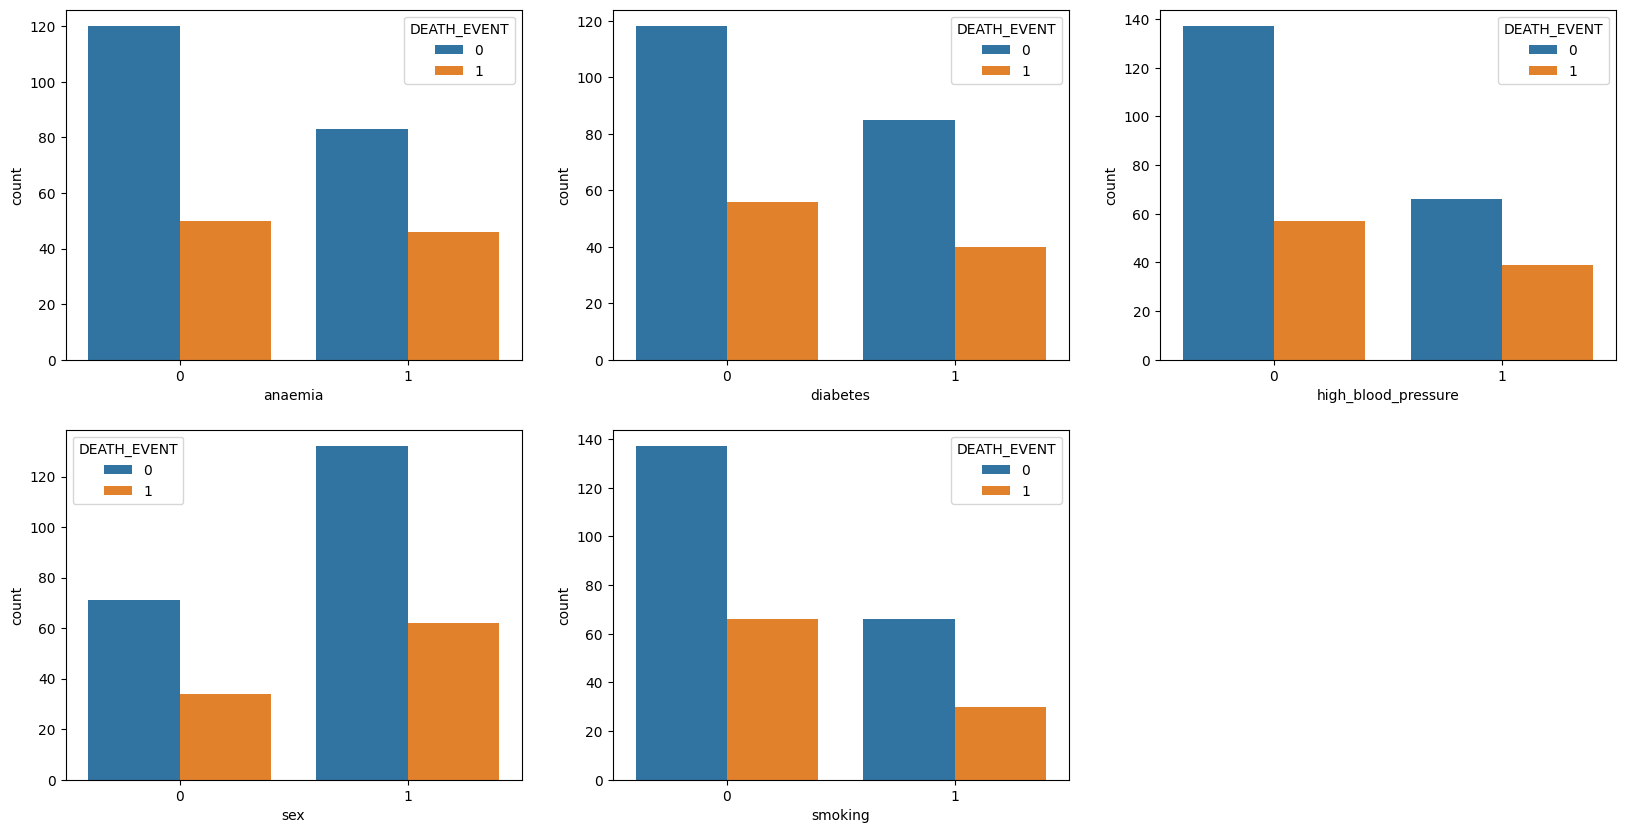

In [33]:
plt.figure(figsize=(20,10))
for i,cat in enumerate(categorial_data):
    plt.subplot(2,3,i+1)
    sns.countplot(data=data,x=cat,hue='DEATH_EVENT')
plt.show()

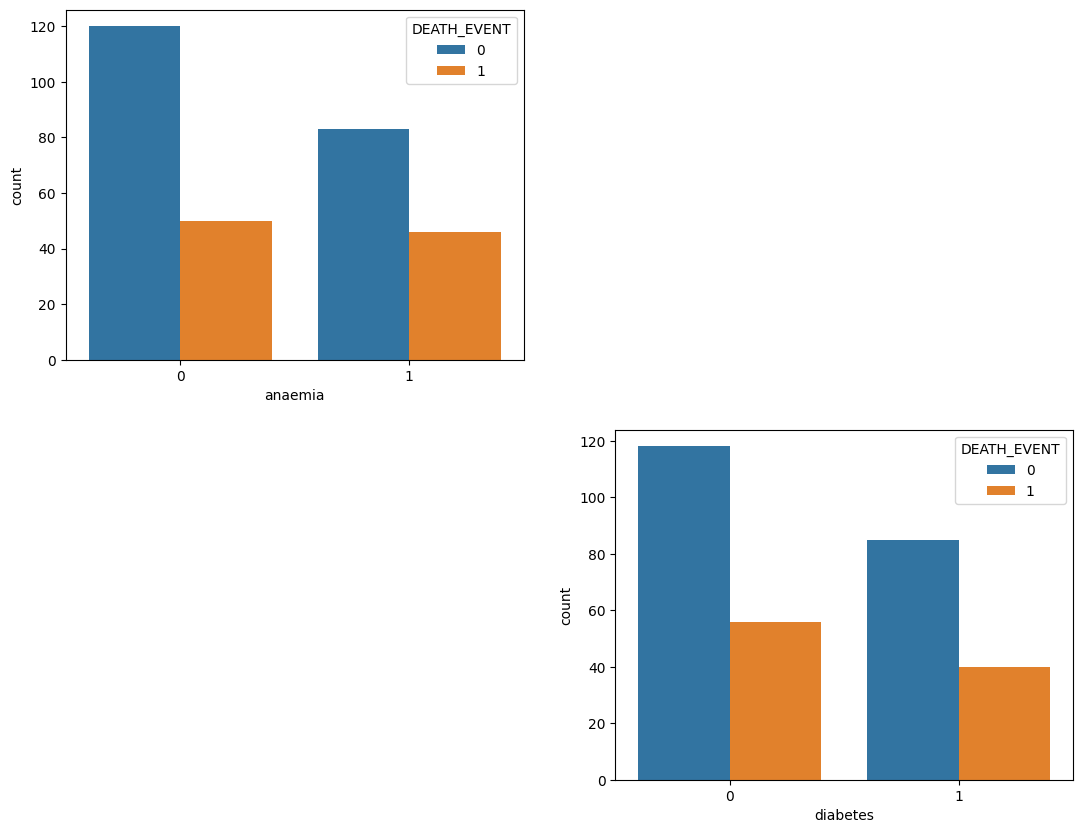

In [34]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
sns.countplot(data=data,x='anaemia',hue='DEATH_EVENT')
plt.subplot(2,2,4)
sns.countplot(data=data,x='diabetes',hue='DEATH_EVENT')
plt.show()

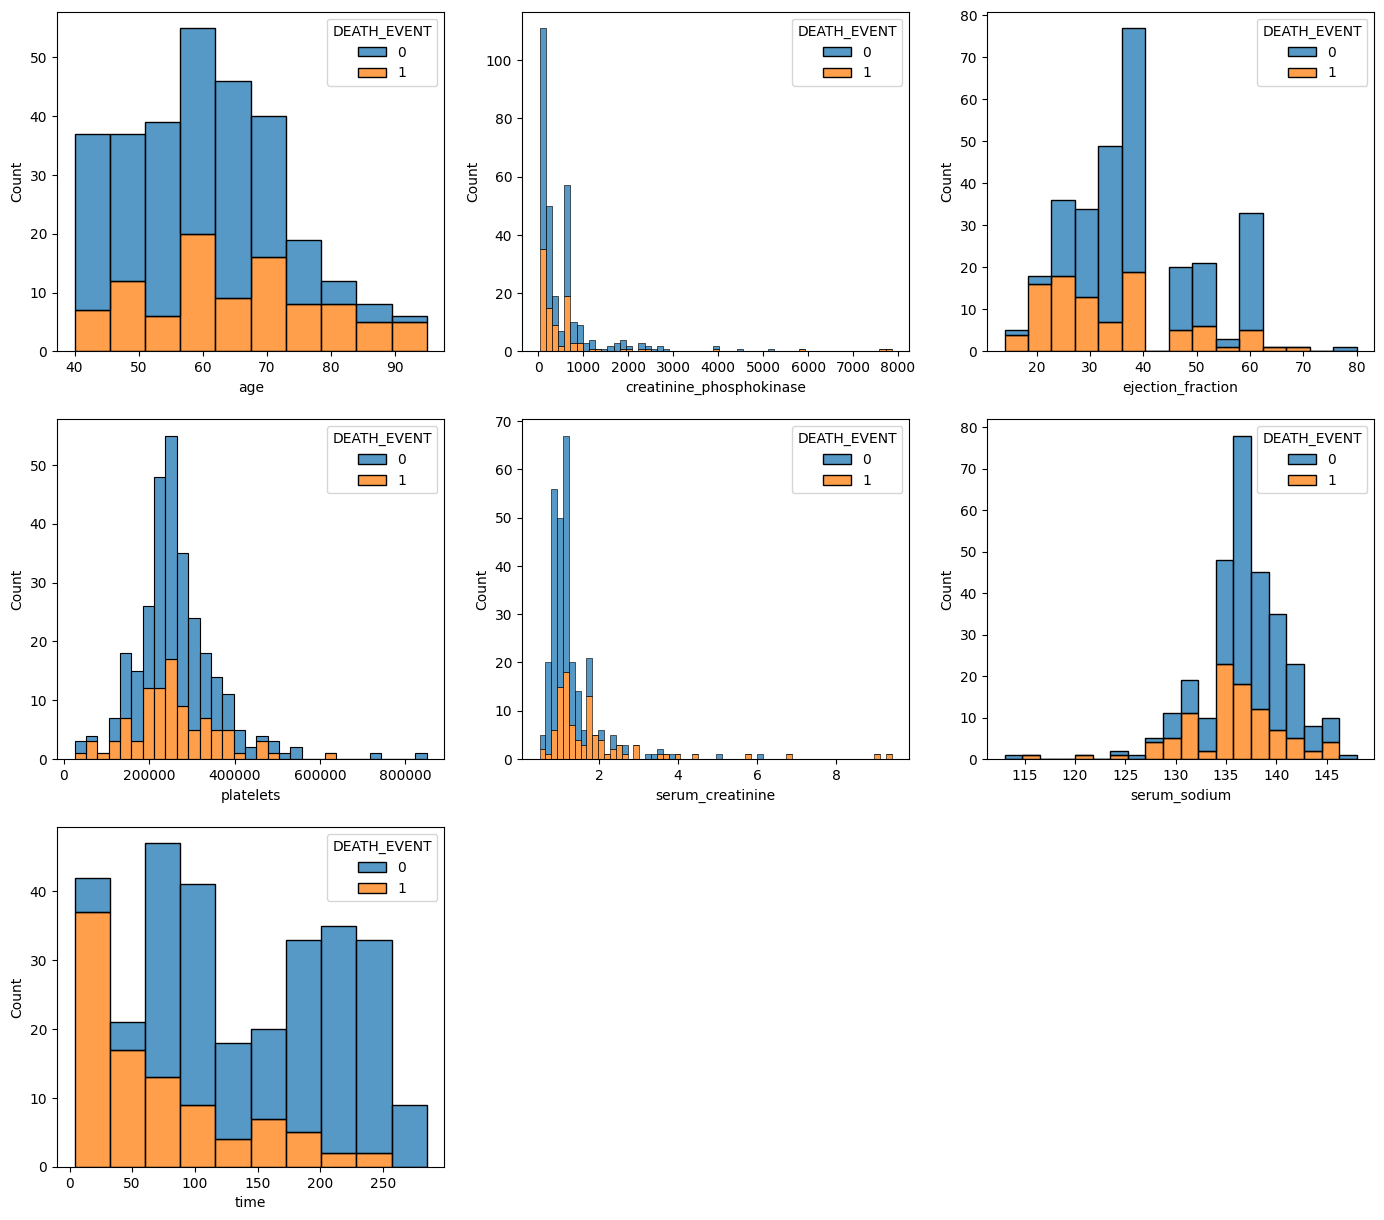

In [35]:
plt.figure(figsize=(17,15))
for i,cat in enumerate(continuous_data):
    plt.subplot(3,3,i+1)
    sns.histplot(data=data,x=cat,hue='DEATH_EVENT',multiple='stack')
plt.show()

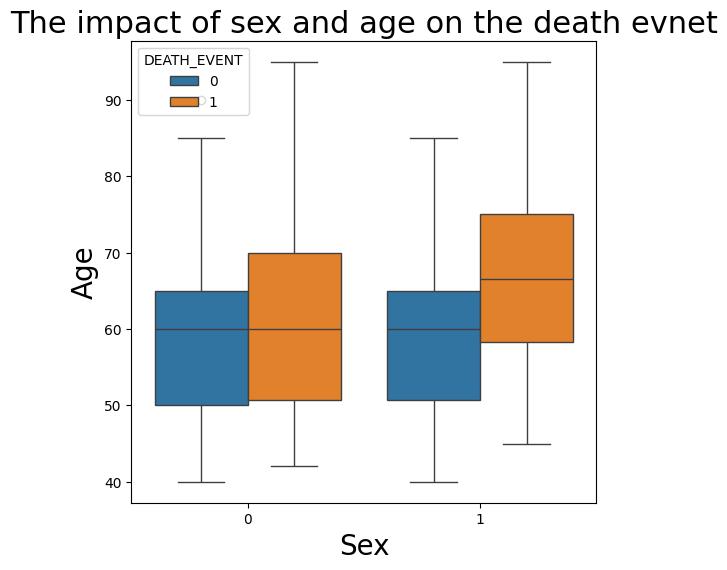

In [36]:
plt.figure(figsize=(6,6))
sns.boxplot(data=data,x='sex',y='age',hue='DEATH_EVENT')
plt.xlabel('Sex',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.title('The impact of sex and age on the death evnet',fontsize=22)
plt.show()

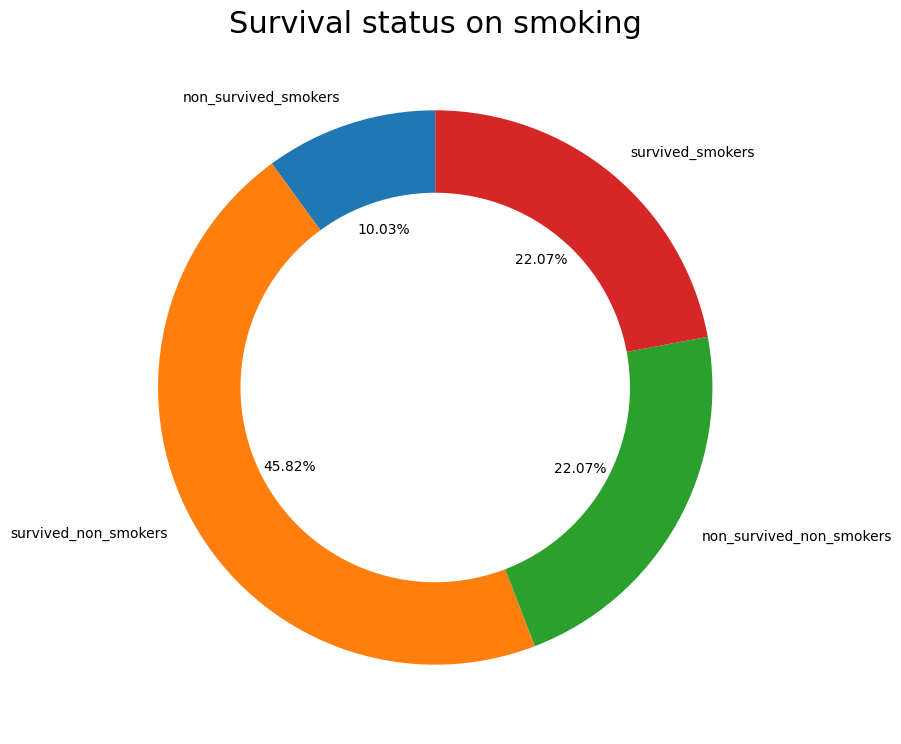

In [37]:
#Analyzing the survival status of smoking
smokers=data[data['smoking']==1]
non_smokers=data[data['smoking']==0]
non_survived_smokers=smokers[smokers['DEATH_EVENT']==1]
survived_smokers=smokers[smokers['DEATH_EVENT']==0]
non_survived_non_smokers=non_smokers[non_smokers['DEATH_EVENT']==1]
survived_non_smokers=non_smokers[non_smokers['DEATH_EVENT']==0]
smoking_labels=['non_survived_smokers','survived_non_smokers','non_survived_non_smokers','survived_smokers']
smoking_data=[len(non_survived_smokers),len(survived_non_smokers),len(non_survived_non_smokers),len(survived_smokers)]

plt.figure(figsize=(9,9))
plt.pie(smoking_data,labels=smoking_labels,autopct='%.2f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color="white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival status on smoking', fontsize=22)
plt.show()

In [38]:
my_dict = dict(zip(smoking_labels, smoking_data))
print(my_dict)

{'non_survived_smokers': 30, 'survived_non_smokers': 137, 'non_survived_non_smokers': 66, 'survived_smokers': 66}


In [39]:
for i in range (len(smoking_data)):
    print(f'{smoking_labels[i]} : {smoking_data[i]*100/sum(smoking_data)}')

non_survived_smokers : 10.033444816053512
survived_non_smokers : 45.819397993311036
non_survived_non_smokers : 22.073578595317727
survived_smokers : 22.073578595317727


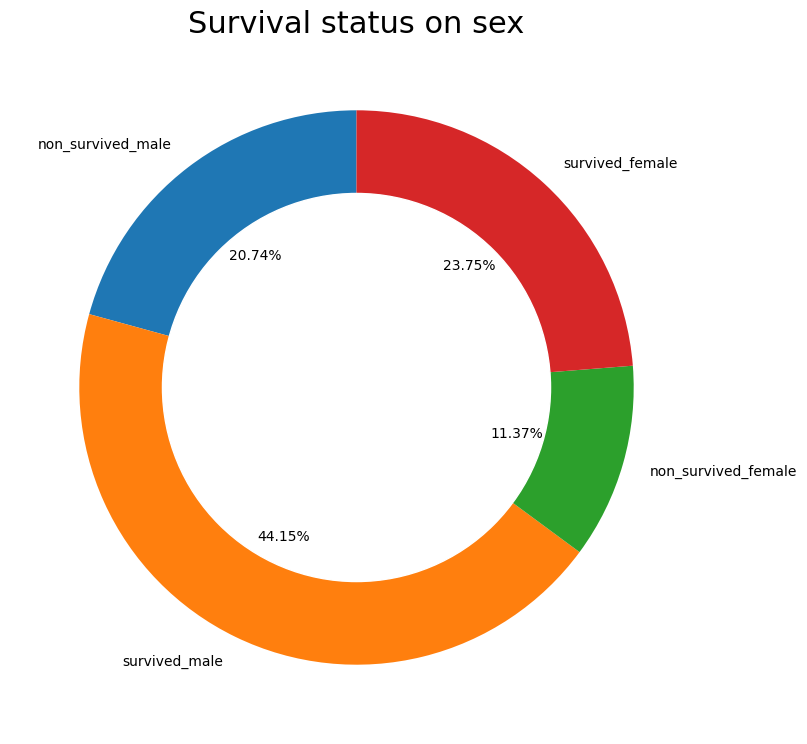

In [40]:
# Analyzing the survival status on sex
male=data[data['sex']==1]
female=data[data['sex']==0]
non_survived_male=male[male['DEATH_EVENT']==1]
survived_male=male[male['DEATH_EVENT']==0]
non_survived_female=female[female['DEATH_EVENT']==1]
survived_female=female[female['DEATH_EVENT']==0]
sex_labels=['non_survived_male','survived_male','non_survived_female','survived_female']
sex_data=[len(non_survived_male),len(survived_male),len(non_survived_female),len(survived_female)]

plt.figure(figsize=(9,9))
plt.pie(sex_data,labels=sex_labels,autopct='%.2f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color="white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival status on sex', fontsize=22)
plt.show()

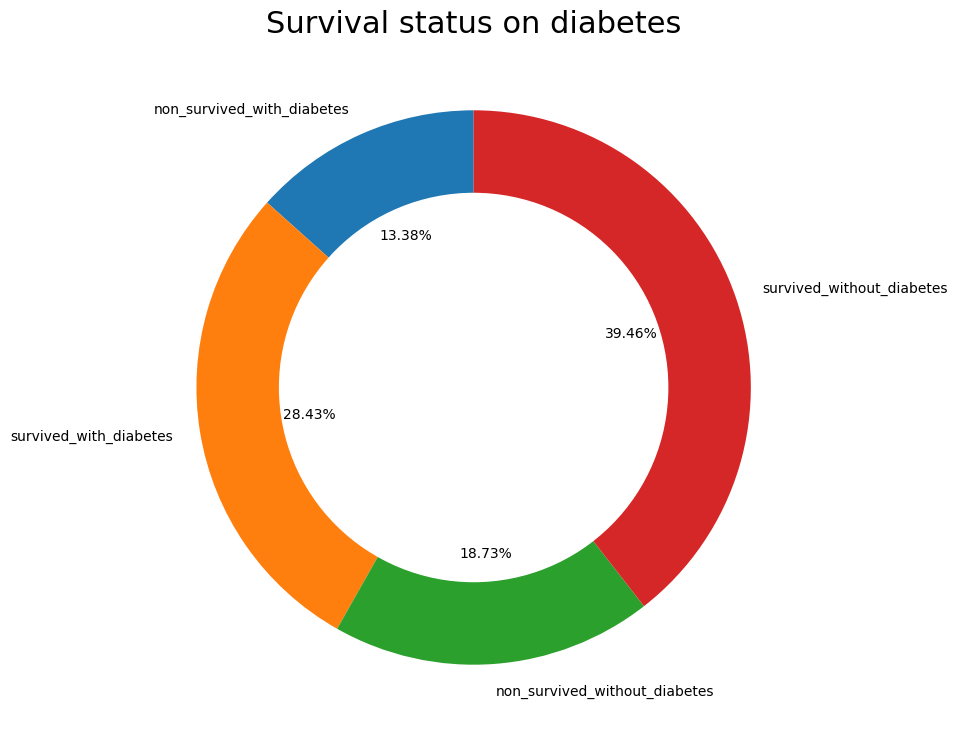

In [41]:
#Analyzing the survival status on diabetes
with_diabetes=data[data['diabetes']==1]
without_diabetes=data[data['diabetes']==0]

non_survived_with_diabetes=with_diabetes[with_diabetes['DEATH_EVENT']==1]
survived_with_diabetes=with_diabetes[with_diabetes['DEATH_EVENT']==0]
non_survived_without_diabetes=without_diabetes[without_diabetes['DEATH_EVENT']==1]
survived_without_diabetes=without_diabetes[without_diabetes['DEATH_EVENT']==0]

diabetes_label=['non_survived_with_diabetes','survived_with_diabetes','non_survived_without_diabetes','survived_without_diabetes']
diabetes_data=[len(non_survived_with_diabetes),len(survived_with_diabetes),len(non_survived_without_diabetes),len(survived_without_diabetes)]

plt.figure(figsize=(9,9))
plt.pie(diabetes_data,labels=diabetes_label,autopct='%.2f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color="white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival status on diabetes', fontsize=22)
plt.show()

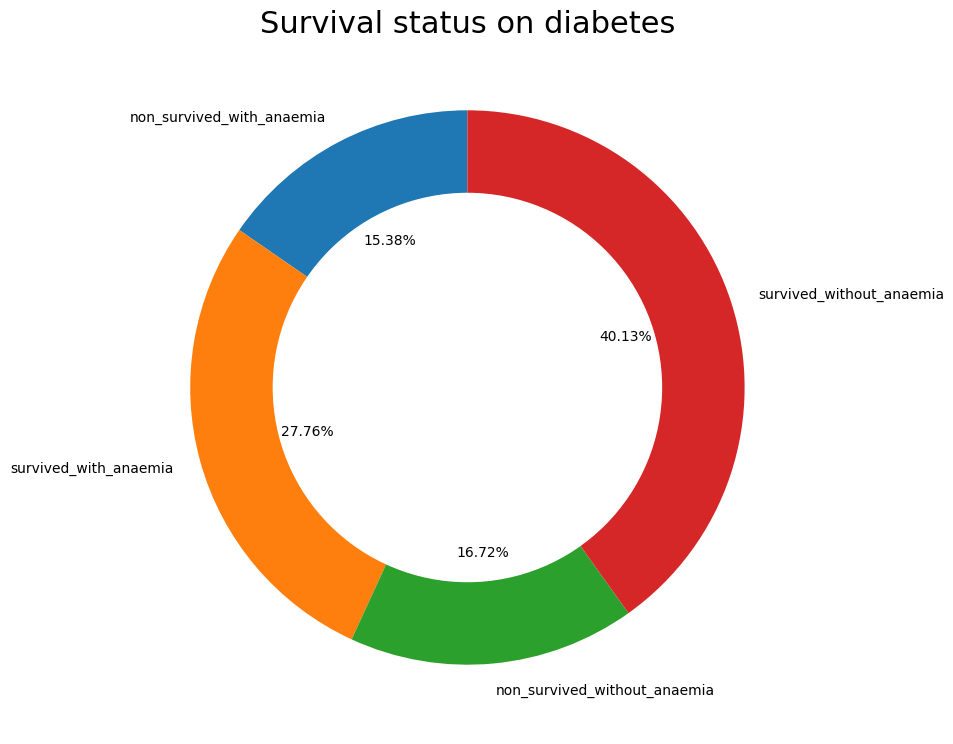

In [42]:
#Analyzing the survival status on anaemia
with_anaemia=data[data['anaemia']==1]
without_anaemia=data[data['anaemia']==0]

non_survived_with_anaemia=with_anaemia[with_anaemia['DEATH_EVENT']==1]
survived_with_anaemia=with_anaemia[with_anaemia['DEATH_EVENT']==0]
non_survived_without_anaemia=without_anaemia[without_anaemia['DEATH_EVENT']==1]
survived_without_anaemia=without_anaemia[without_anaemia['DEATH_EVENT']==0]

anaemia_label=['non_survived_with_anaemia','survived_with_anaemia','non_survived_without_anaemia','survived_without_anaemia']
anaemia_data=[len(non_survived_with_anaemia),len(survived_with_anaemia),len(non_survived_without_anaemia),len(survived_without_anaemia)]

plt.figure(figsize=(9,9))
plt.pie(anaemia_data,labels=anaemia_label,autopct='%.2f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color="white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival status on diabetes', fontsize=22)
plt.show()

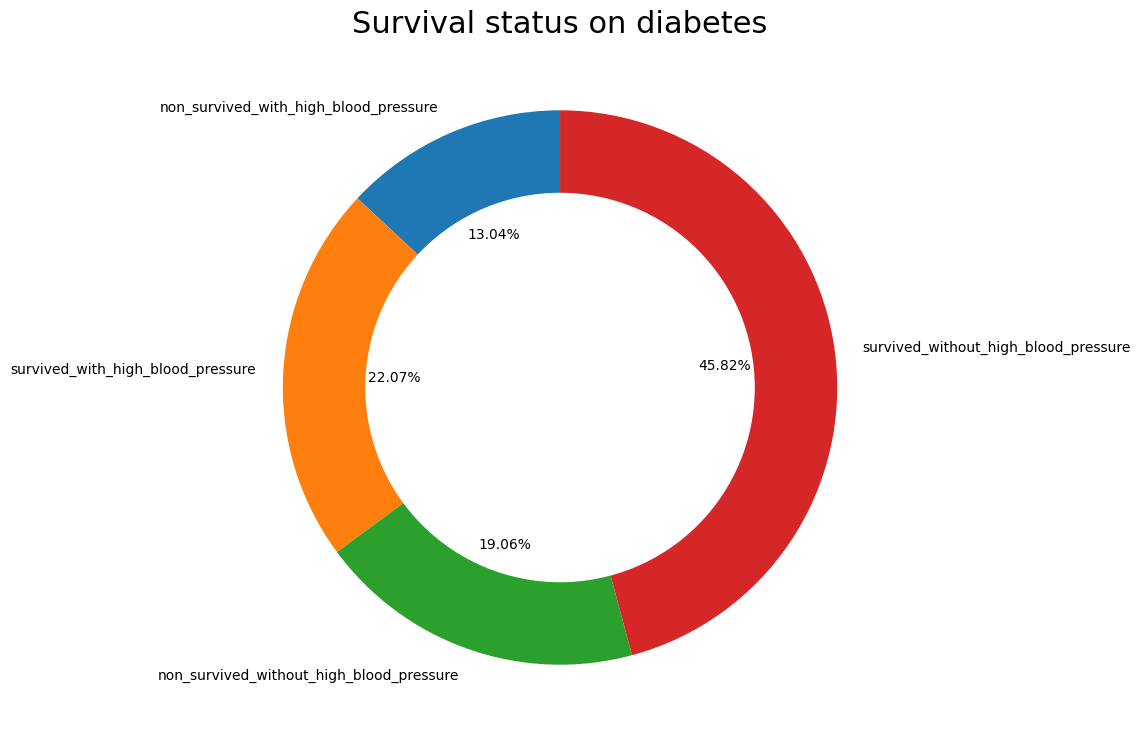

In [43]:
#Analyzing the survival status on high blood pressure
with_high_blood_pressure=data[data['high_blood_pressure']==1]
without_high_blood_pressure=data[data['high_blood_pressure']==0]

non_survived_with_high_blood_pressure=with_high_blood_pressure[with_high_blood_pressure['DEATH_EVENT']==1]
survived_with_high_blood_pressure=with_high_blood_pressure[with_high_blood_pressure['DEATH_EVENT']==0]
non_survived_without_high_blood_pressure=without_high_blood_pressure[without_high_blood_pressure['DEATH_EVENT']==1]
survived_without_high_blood_pressure=without_high_blood_pressure[without_high_blood_pressure['DEATH_EVENT']==0]

high_blood_pressure_label=['non_survived_with_high_blood_pressure','survived_with_high_blood_pressure','non_survived_without_high_blood_pressure','survived_without_high_blood_pressure']
high_blood_pressure_data=[len(non_survived_with_high_blood_pressure),len(survived_with_high_blood_pressure),len(non_survived_without_high_blood_pressure),len(survived_without_high_blood_pressure)]

plt.figure(figsize=(9,9))
plt.pie(high_blood_pressure_data,labels=high_blood_pressure_label,autopct='%.2f%%',startangle=90)
circle=plt.Circle((0,0),0.7,color="white")
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Survival status on diabetes', fontsize=22)
plt.show()

#  3. Data modeling & prediction using continuous data:


In [44]:
x = data[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","serum_sodium","time"]]
y = data["DEATH_EVENT"]

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)
